# Data Visualization: Exploring with Seaborn [Revision]

https://cursos.alura.com.br/course/data-visualization-com-seaborn

## Importing the data

### import a file called tips.csv and store it in a variable called data

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('tips.csv')

### know the data we are going to analyze

In [4]:
data.head(10)

total_bill   tip dessert  day    time  size
0       16.99  1.01      No  Sun  Dinner     2
1       10.34  1.66      No  Sun  Dinner     3
2       21.01  3.50      No  Sun  Dinner     3
3       23.68  3.31      No  Sun  Dinner     2
4       24.59  3.61      No  Sun  Dinner     4
5       25.29  4.71      No  Sun  Dinner     4
6        8.77  2.00      No  Sun  Dinner     2
7       26.88  3.12      No  Sun  Dinner     4
8       15.04  1.96      No  Sun  Dinner     2
9       14.78  3.23      No  Sun  Dinner     2

## Comparing distributions in an exploratory way

### import Seaborn to generate different graphics

In [5]:
import seaborn as sns

### analyzed in a visual and descriptive way the value of the tip in relation to the value of the bill

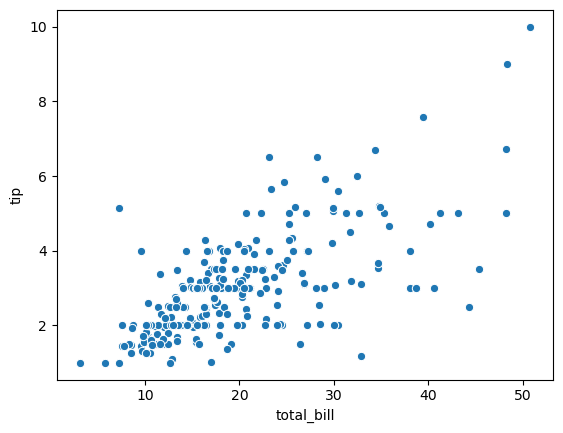

In [6]:
tip_bill_relation = sns.scatterplot(data = data, x = 'total_bill', y = 'tip')

In [7]:
# visually, the tip amount increases with the bill amount

In [8]:
data['percentage'] = data['tip']/data['total_bill']
data['percentage'] = data.percentage.round(2)

In [9]:
data.head(5)

total_bill   tip dessert  day    time  size  percentage
0       16.99  1.01      No  Sun  Dinner     2        0.06
1       10.34  1.66      No  Sun  Dinner     3        0.16
2       21.01  3.50      No  Sun  Dinner     3        0.17
3       23.68  3.31      No  Sun  Dinner     2        0.14
4       24.59  3.61      No  Sun  Dinner     4        0.15

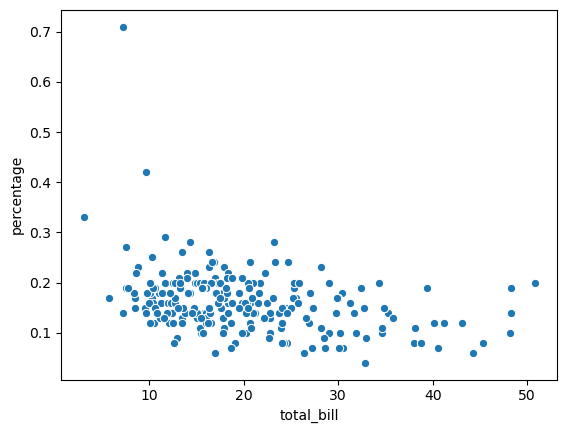

In [45]:
percentage_tip_bill = sns.scatterplot(data = data, x = 'total_bill', y = 'percentage')

### create different types of charts

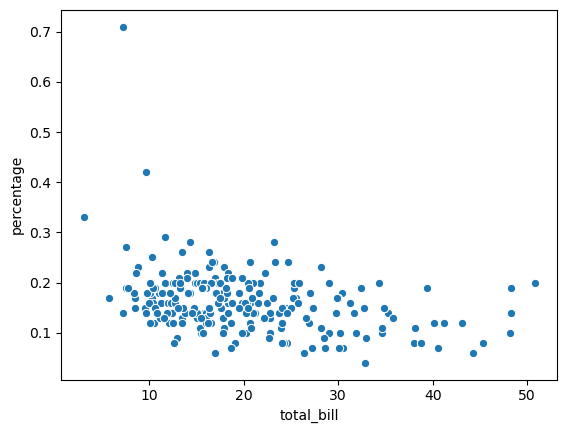

In [11]:
percentage_tip_bill = sns.scatterplot(data = data, x = 'total_bill', y = 'percentage')

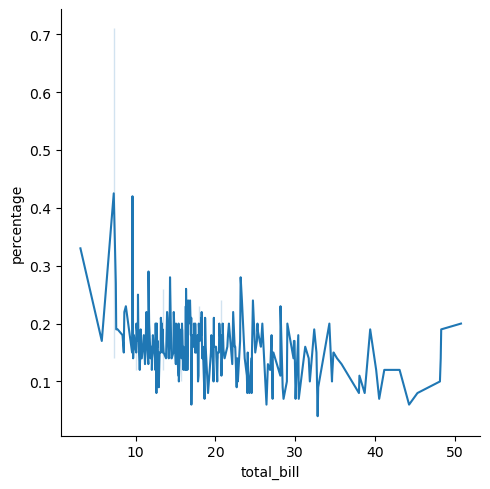

In [12]:
percentage_tip_bill_line = sns.relplot(data=data, x='total_bill', y='percentage', kind='line')

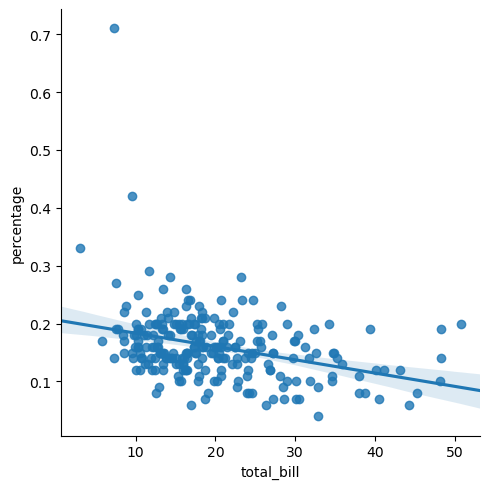

In [13]:
percentage_tip_bill_progression = sns.lmplot(data = data, x='total_bill', y='percentage')
sns = sns

## Visually and descriptively analyzing

### do a descriptive analysis of people who ordered dessert and didn't order dessert with the describe() function

In [29]:
data.sample(5)

total_bill   tip dessert   day    time  size  percentage
160       21.50  3.50      No   Sun  Dinner     4        0.16
82        10.07  1.83      No  Thur   Lunch     1        0.18
138       16.00  2.00     Yes  Thur   Lunch     2        0.12
168       10.59  1.61     Yes   Sat  Dinner     2        0.15
237       32.83  1.17     Yes   Sat  Dinner     2        0.04

In [159]:
data[data.dessert == 'Yes'].describe()[['total_bill', 'tip', 'percentage']]

total_bill        tip  percentage
count   93.000000  93.000000   93.000000
mean    20.756344   3.008710    0.163226
std      9.832154   1.401468    0.085060
min      3.070000   1.000000    0.040000
25%     13.420000   2.000000    0.110000
50%     17.920000   3.000000    0.150000
75%     26.860000   3.680000    0.200000
max     50.810000  10.000000    0.710000

In [160]:
data[data.dessert == 'No'].describe()[['total_bill', 'tip', 'percentage']]

total_bill         tip  percentage
count  151.000000  151.000000  151.000000
mean    19.188278    2.991854    0.159536
std      8.255582    1.377190    0.039889
min      7.250000    1.000000    0.060000
25%     13.325000    2.000000    0.140000
50%     17.590000    2.740000    0.160000
75%     22.755000    3.505000    0.185000
max     48.330000    9.000000    0.290000

####  ! Descriptively, the amount of the tip does not appear to change by dessert order

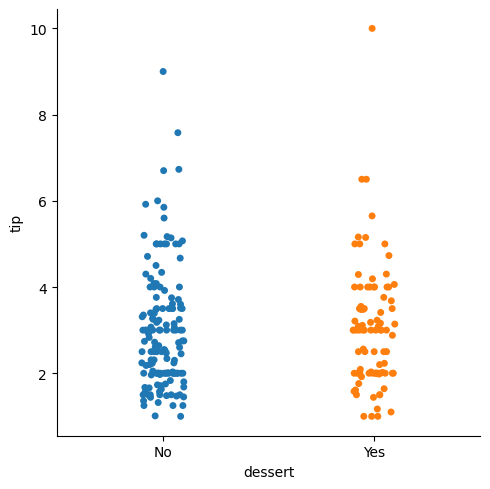

In [31]:
sns.catplot(x = 'dessert', y = 'tip', data = data)
sns = sns

####  ! Visualy, the amount of the tip does not appear to change by dessert order

### generate graphics by changing the hue with hue parameter

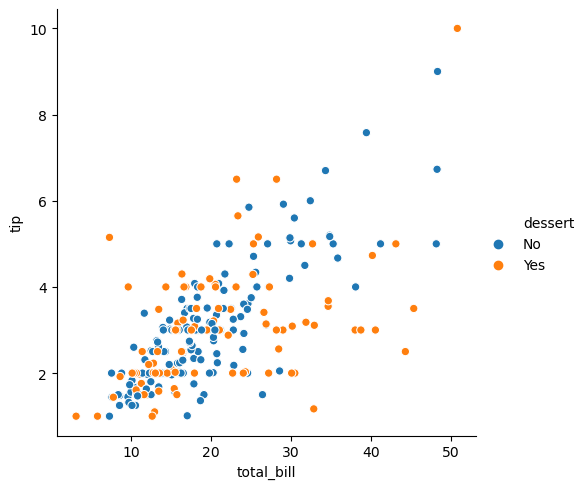

In [49]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'dessert', data = data)
sns = sns

### categorize information into different graphs with the parameter col

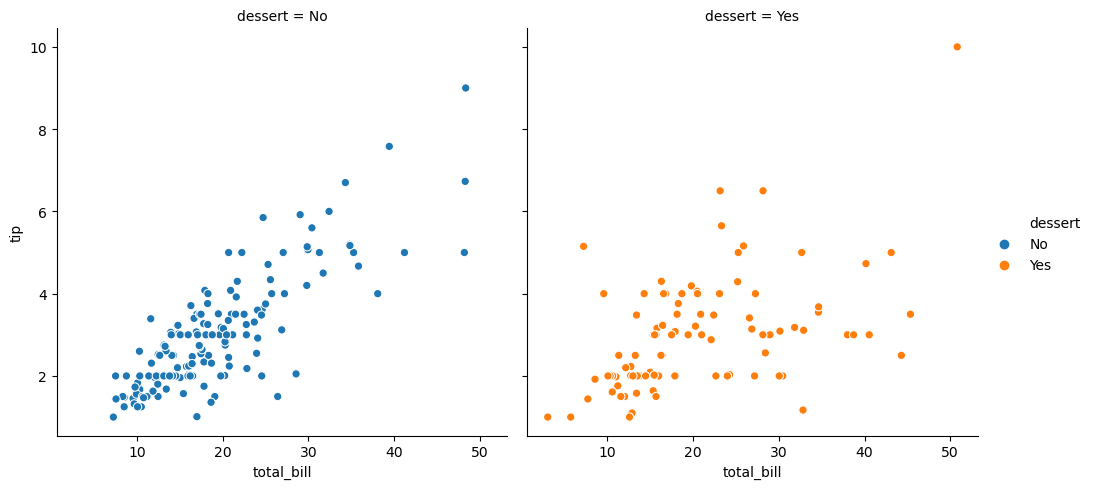

In [37]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'dessert', col = 'dessert', data = data)
sns = sns

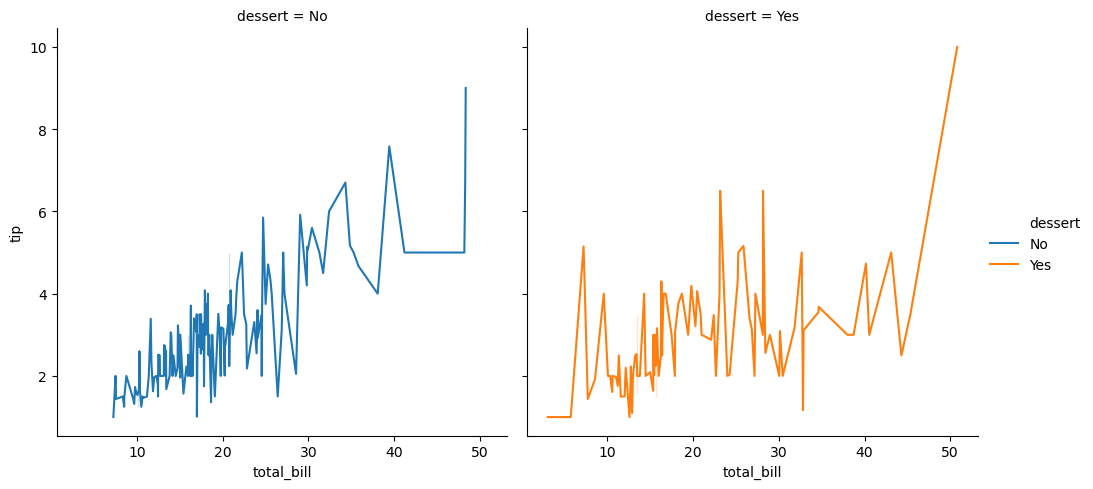

In [54]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'dessert', col = 'dessert', kind = 'line', data = data)
sns = sns

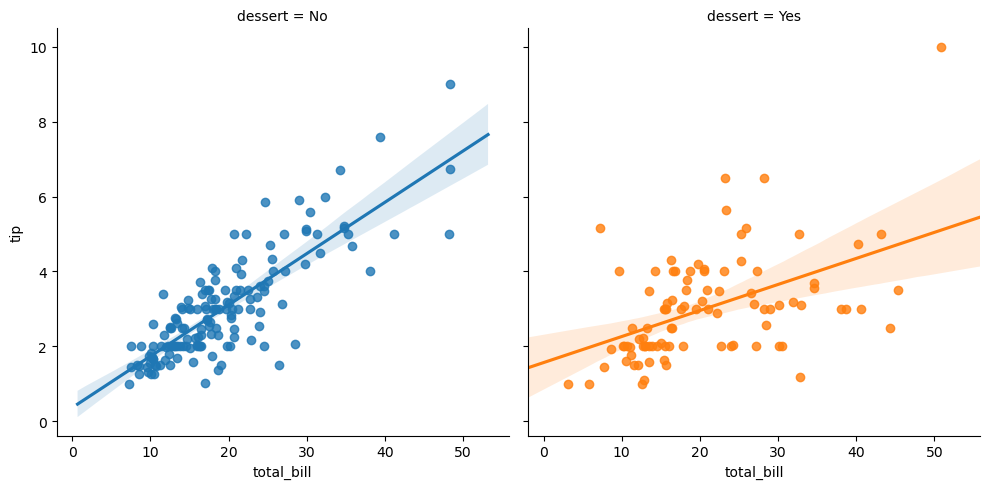

In [50]:
sns.lmplot(x = 'total_bill', y = 'tip', col = 'dessert', hue = 'dessert', data = data)
sns = sns

#### ! Visually, there appears to be a difference in tip amount between orders with and without dessert

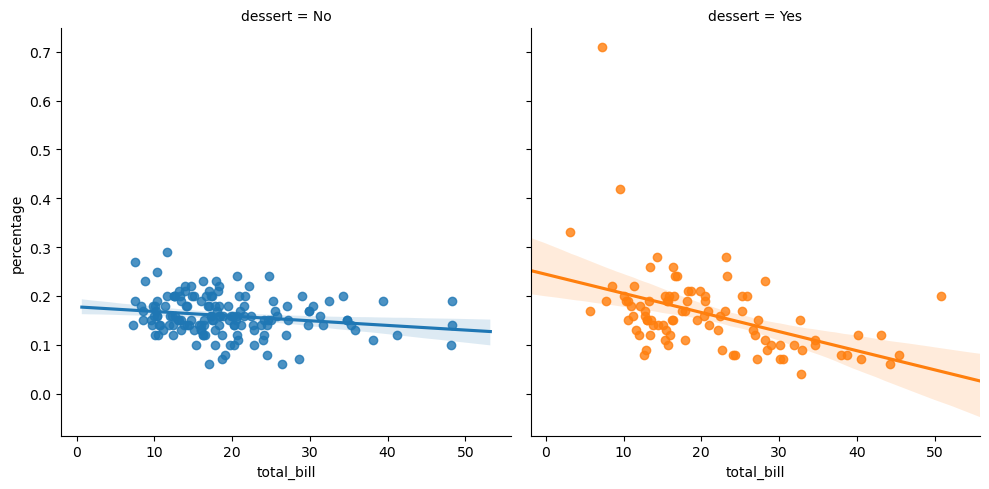

In [51]:
sns.lmplot(x = 'total_bill', y = 'percentage', col = 'dessert', hue = 'dessert', data = data)
sns = sns

#### ! Visually, the tip percentage of the bill appears to vary by dessert order.

### performed the hypothesis test, analyzing the tip percentage of those who ordered and did not order dessert.

### Hypothesis test

**H<sup>null</sup>**
> **The tip rate distribution is the same in both groups**

**H<sup>alt</sup>**
> **The tip rate distribution is not the same in both groups**

In [58]:
from scipy.stats import ranksums

In [76]:
yes_dessert = data.query("dessert == 'Yes'").percentage

In [77]:
no_dessert = data.query("dessert == 'No'").percentage

In [79]:
r = ranksums(yes_dessert, no_dessert)

In [81]:
pvalue = r.pvalue
pvalue

0.5266635660124415

**H<sup>null</sup>**
> **The tip rate distribution is the same in both groups**

## Comparing and exploring the days of the week

### analyze the amount of the bill and tip for each day of the week

In [113]:
data.sample(5)

total_bill   tip dessert  day    time  size  percentage
221       13.42  3.48     Yes  Fri   Lunch     2        0.26
237       32.83  1.17     Yes  Sat  Dinner     2        0.04
48        28.55  2.05      No  Sun  Dinner     3        0.07
239       29.03  5.92      No  Sat  Dinner     3        0.20
16        10.33  1.67      No  Sun  Dinner     3        0.16

In [120]:
data['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

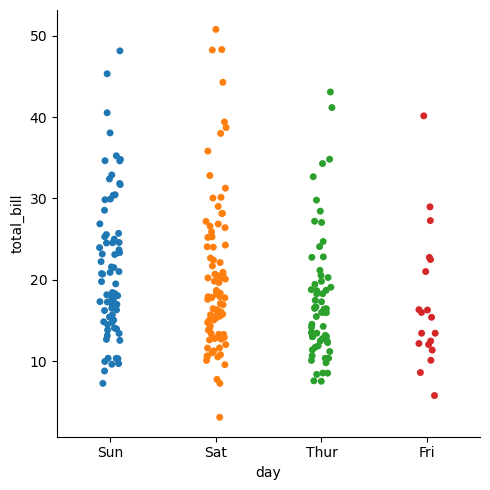

In [135]:
sns.catplot(x = 'day', y = 'total_bill', data = data)
sns = sns

#### ! Visually the total bill looks bigger on weekends

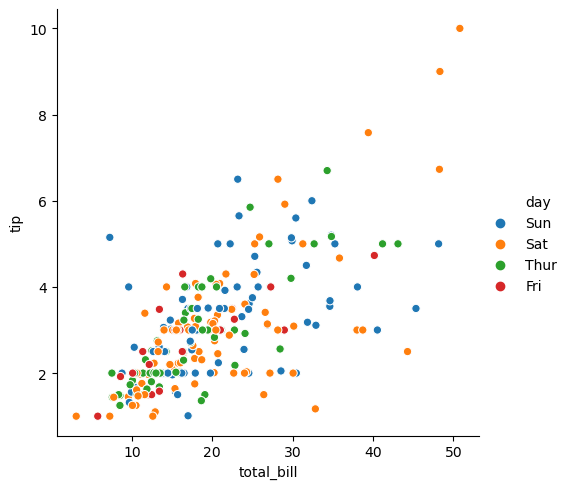

In [142]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'day', data = data)
sns = sns

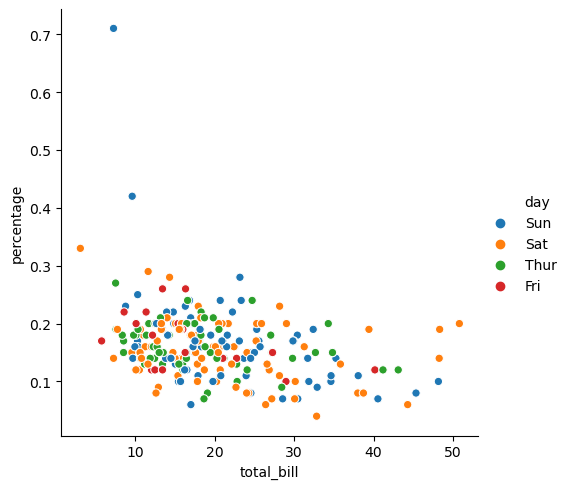

In [144]:
sns.relplot(x = 'total_bill', y = 'percentage', hue = 'day', data = data)
sns = sns

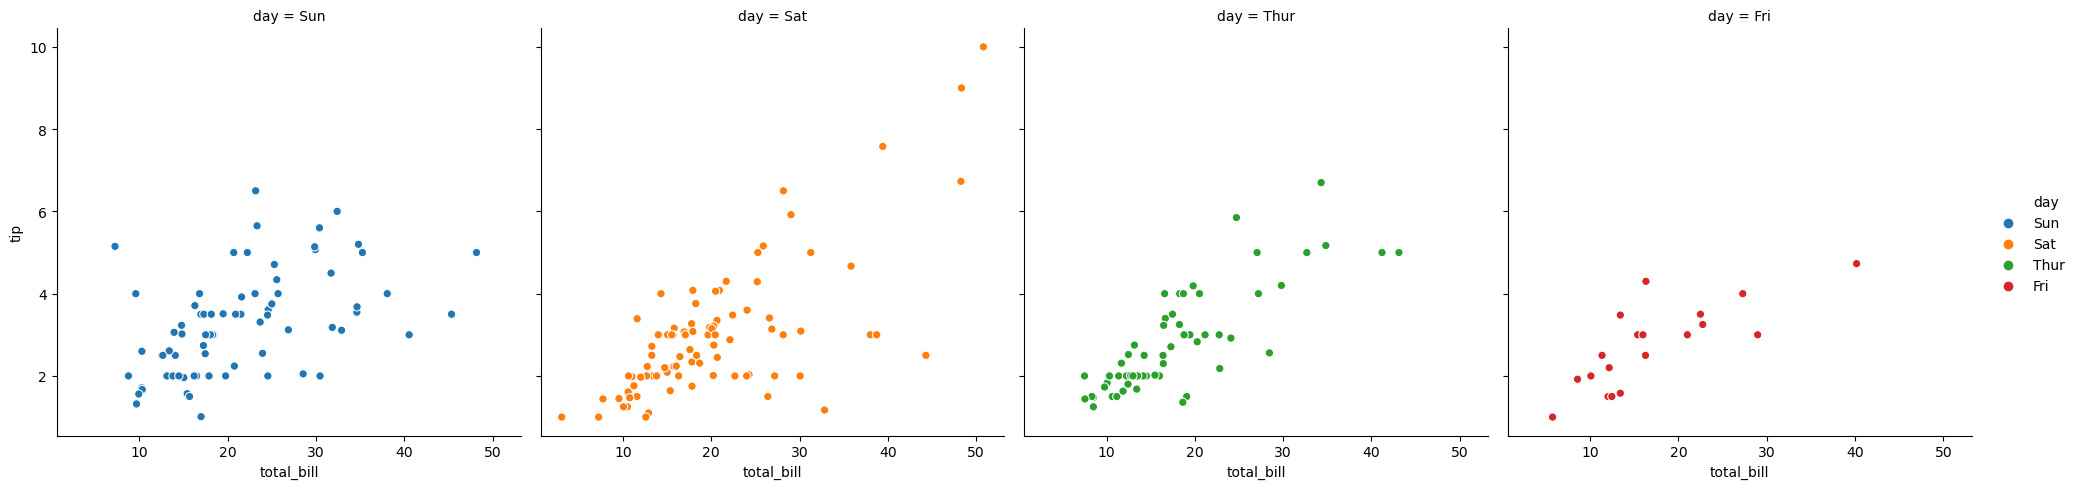

In [201]:
sns.relplot(x = 'total_bill', y = 'tip', hue = 'day', col = 'day', data = data)
sns = sns

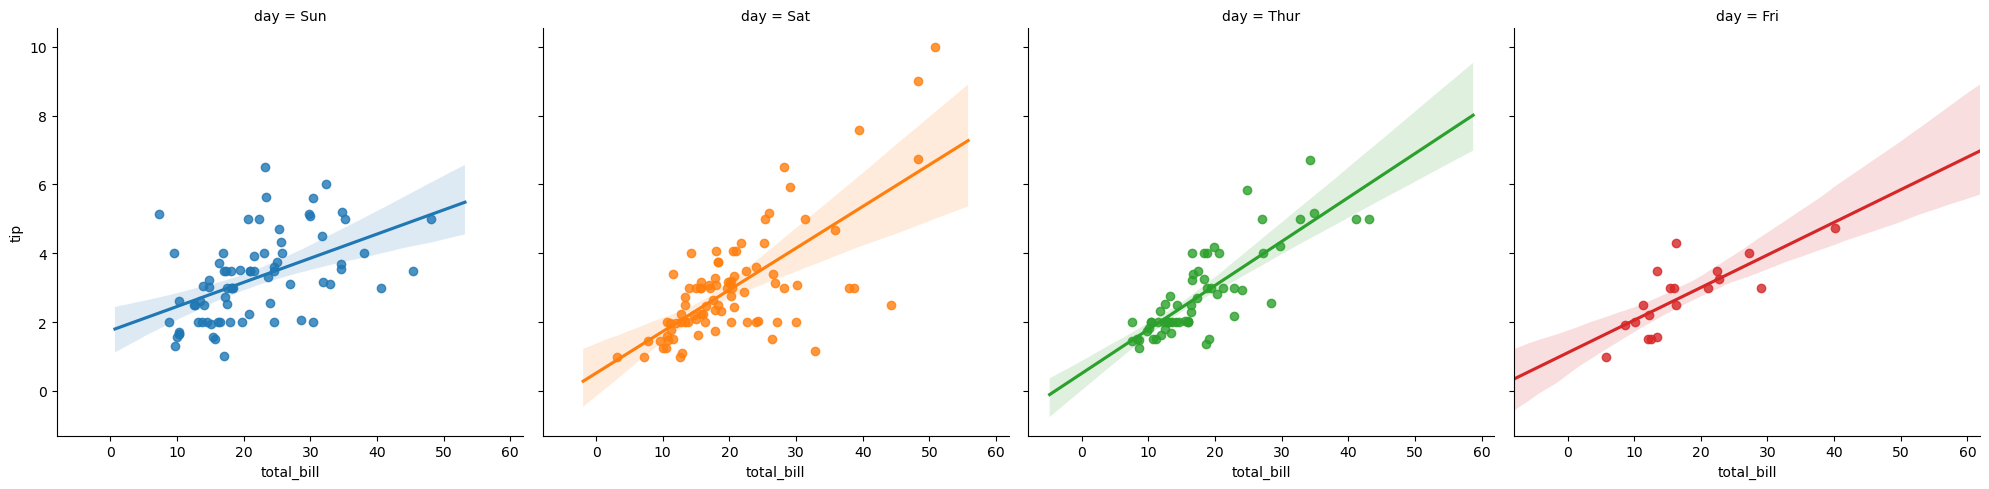

In [200]:
sns.lmplot(x = 'total_bill', y = 'tip', hue = 'day', col = 'day', data = data)
sns = sns

#### ! Visually, the tip amount appears to be higher on weekends

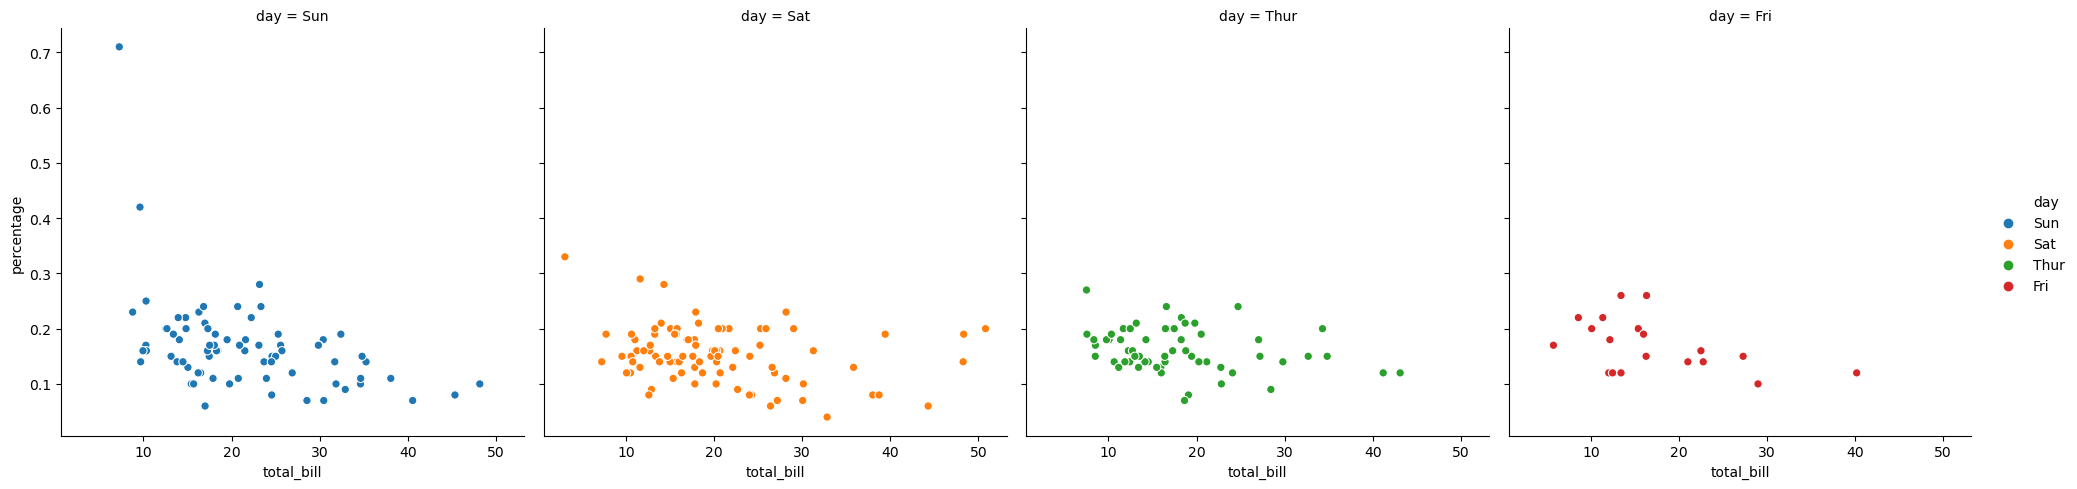

In [199]:
sns.relplot(x = 'total_bill', y = 'percentage', hue = 'day', col = 'day', data = data)
sns = sns

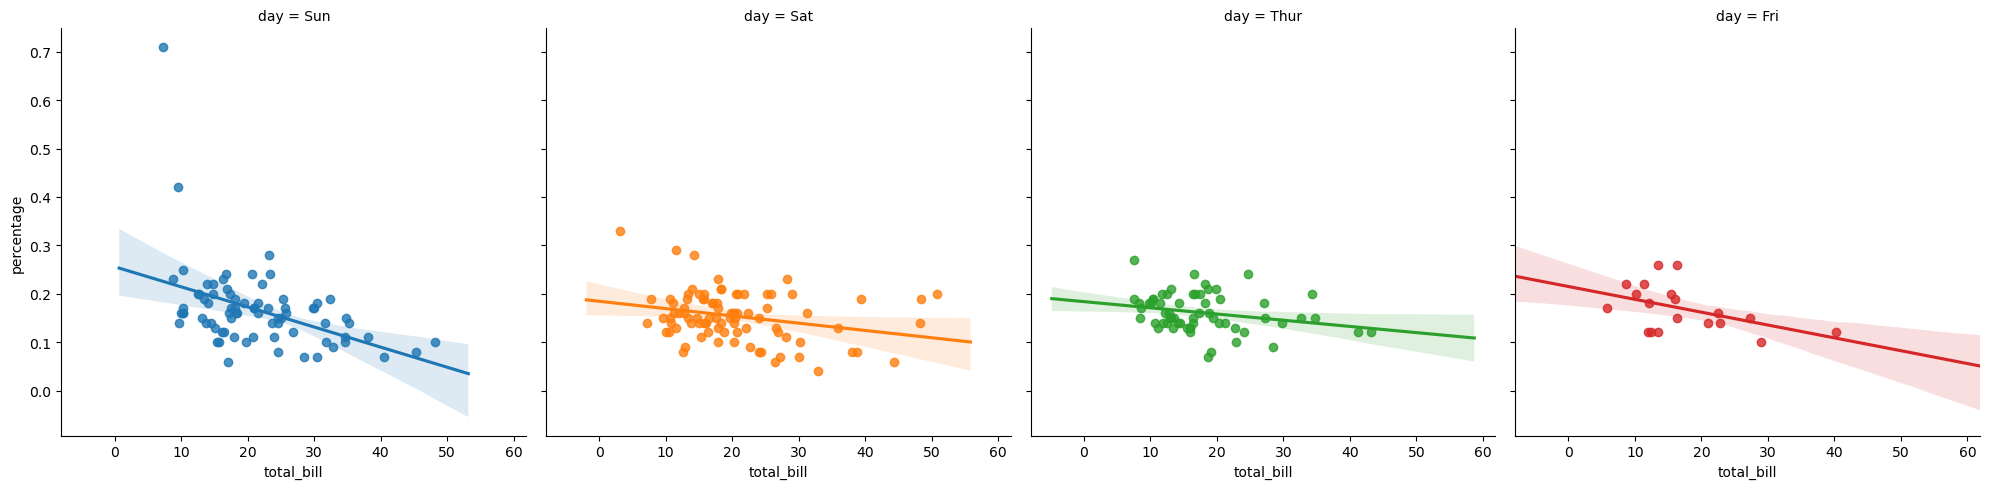

In [198]:
sns.lmplot(x = 'total_bill', y = 'percentage', hue = 'day', col = 'day', data = data)
sns = sns

#### ! Visually, the tip percentage seems to drop more on Sunday and Friday

### in the descriptive analysis, check the frequency of each day

In [153]:
data.tip.mean()

2.9982786885245902

In [158]:
data.groupby('day').mean()[['total_bill', 'tip', 'percentage']]

total_bill       tip  percentage
day                                   
Fri    17.151579  2.734737    0.169474
Sat    20.441379  2.993103    0.153678
Sun    21.410000  3.255132    0.166974
Thur   17.682742  2.771452    0.161129

In [165]:
print('frequency of days')
data.day.value_counts()

frequency of days


Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

### Hypothesis test

**H<sup>null</sup>**
> **The total bill rate distribution is the same in weekends and weekdays**

**H<sup>alt</sup>**
> **The total bill rate distribution is not the same in weekends and weekdays**

In [176]:
weekends_total_bill = data.query("day == 'Sat' | day == 'Sun'").total_bill

In [177]:
weekdays_total_bill = data.query("day == 'Thur' | day == 'Fri'").total_bill

In [180]:
r = ranksums(weekends_total_bill,weekdays_total_bill)
r

RanksumsResult(statistic=3.065334775178676, pvalue=0.0021742647385747773)

In [181]:
pvalue = r.pvalue
pvalue

0.0021742647385747773

**H<sup>alt</sup>**
> **The total bill rate distribution is not the same in weekends and weekdays**

### Hypothesis test

**H<sup>null</sup>**
> **The total bill rate distribution is the same in Saturday and Sunday**

**H<sup>alt</sup>**
> **The total bill distribution is not the same in Saturday and Sunday**

In [183]:
saturday_total_bill = data.query("day == 'Sat'").total_bill

In [184]:
sunday_total_bill = data.query("day == 'Sun'").total_bill

In [186]:
r = ranksums(saturday_total_bill, sunday_total_bill)
r

RanksumsResult(statistic=-0.9198084864360142, pvalue=0.3576728477868443)

In [187]:
pvalue = r.pvalue
pvalue

0.3576728477868443

**H<sup>null</sup>**
> **The total bill rate distribution is the same in Saturday and Sunday**

## Frequency distribution and hypothesis test

### analyzed in a visual and descriptive way the differences between the values ​​of the lunch and dinner bills

In [189]:
data.sample(5)

total_bill   tip dessert   day    time  size  percentage
3         23.68  3.31      No   Sun  Dinner     2        0.14
123       15.95  2.00      No  Thur   Lunch     2        0.13
137       14.15  2.00      No  Thur   Lunch     2        0.14
166       20.76  2.24      No   Sun  Dinner     2        0.11
93        16.32  4.30     Yes   Fri  Dinner     2        0.26

In [190]:
data.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

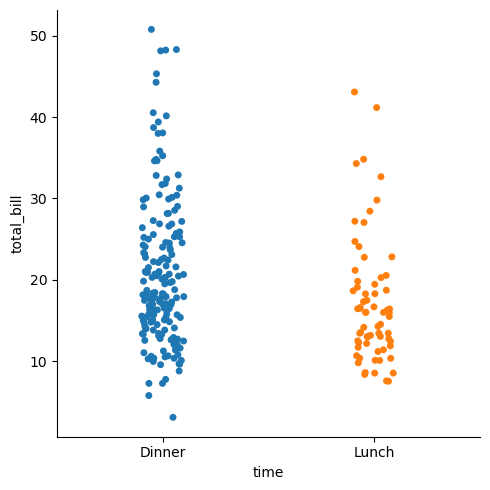

In [196]:
sns.catplot(x = 'time', y = 'total_bill', data = data)
sns = sns

#### ! Visually, total bills look higher at dinner than lunch

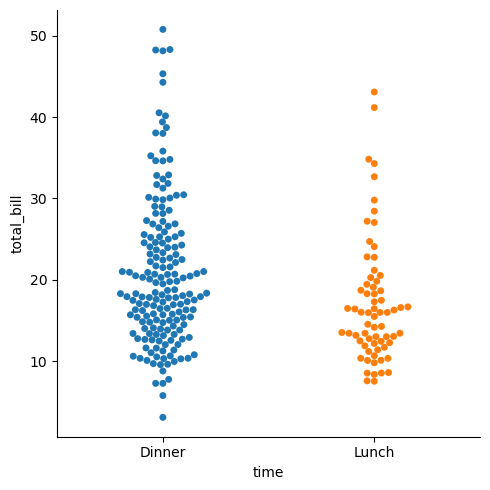

In [197]:
sns.catplot(x = 'time', y = 'total_bill', kind = 'swarm', data = data)
sns = sns

### how to generate different graphs such as a histogram, violin graph and a boxplot with Seaborn

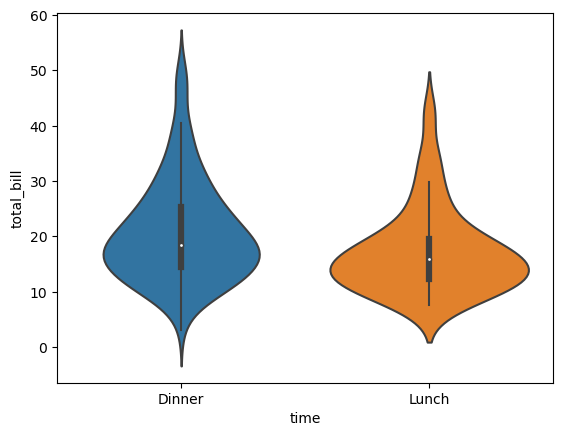

In [203]:
sns.violinplot(x = 'time', y = 'total_bill', data = data)
sns = sns

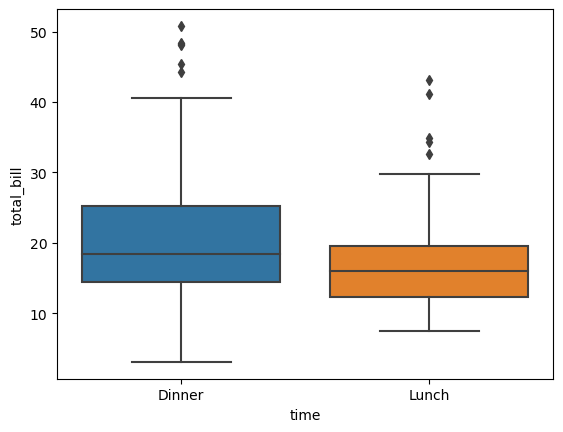

In [204]:
sns.boxplot(x = 'time', y = 'total_bill', data = data)
sns = sns

In [213]:
lunch_total_bill = data.query("time == 'Lunch'").total_bill

In [212]:
dinner_total_bill = data.query("time == 'Dinner'").total_bill

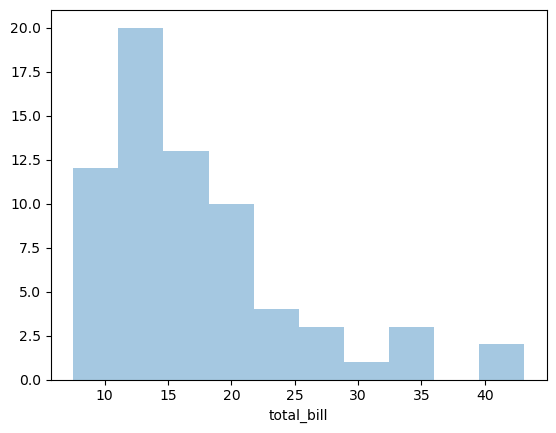

In [219]:
sns.distplot(lunch_total_bill, kde = False)
sns = sns

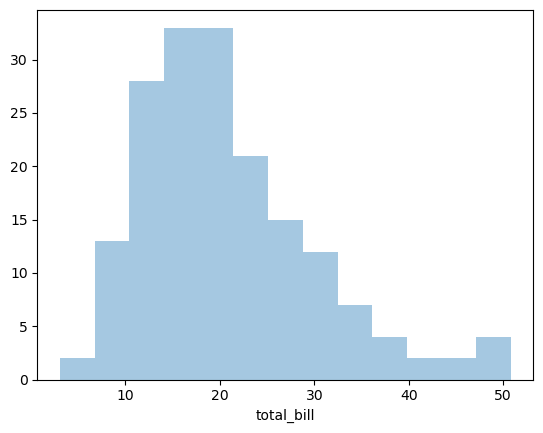

In [218]:
sns.distplot(dinner_total_bill, kde = False)
sns = sns

### Hypothesis test

**H<sup>null</sup>**
> **The total bill rate distribution is the same in lunch and dinner**

**H<sup>alt</sup>**
> **The total bill rate distribution is not the same in lunch and dinner**

In [224]:
data.groupby('time').mean()[['total_bill', 'tip', 'percentage']]

total_bill       tip  percentage
time                                    
Dinner   20.797159  3.102670    0.159773
Lunch    17.168676  2.728088    0.163971

In [225]:
lunch_total_bill = data.query("time == 'Lunch'").total_bill

In [226]:
dinner_total_bill = data.query("time == 'Dinner'").total_bill

In [229]:
r = ranksums(lunch_total_bill, dinner_total_bill)
r

RanksumsResult(statistic=-3.2438872807262955, pvalue=0.0011791039723641672)

In [230]:
pvalue = r.pvalue
pvalue

0.0011791039723641672

**H<sup>alt</sup>**
> **The total bill rate distribution is not the same in lunch and dinner**

### Hypothesis test

**H<sup>null</sup>**
> **The tip rate distribution is the same in lunch and dinner**

**H<sup>alt</sup>**
> **The tip rate distribution is not the same in lunch and dinner**

In [233]:
lunch_percentage = data.query("time == 'Lunch'").percentage

In [234]:
dinner_percentage = data.query("time == 'Dinner'").percentage

In [235]:
r = ranksums(lunch_percentage, dinner_percentage)
r

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

In [236]:
pvalue = r.pvalue
pvalue

0.2602493995587126

**H<sup>null</sup>**
> **The tip rate distribution is the same in lunch and dinner**